In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
baseball_df = pd.read_csv('baseball.csv')
baseball_df.head()

,Player,MLE,TRUTH
0,1,0.345,0.298
1,2,0.333,0.346
2,3,0.322,0.222
3,4,0.311,0.276
4,5,0.289,0.263


#### We suppose that number of hits for player i $h_i \sim Bin(90, \pi_i)$.
#### Thus, each player's batting average $p_i \sim Bin(90, \pi_i)/90$, where $\pi_i$ is its true average.
#### MLE column represents MLE estimate of $p_i$ (mean proportion) of first 90 at bats

In [9]:
# Using Normal Approximation...
# Get binomial variance
baseball_df['pi_90'] = baseball_df['MLE']
p_bar = baseball_df['pi_90'].mean()
p_variance = p_bar * (1- p_bar) / 90
# Transform to N(mu, 1) distr.
baseball_df['x_norm'] = baseball_df['pi_90'] / np.sqrt(p_variance)
# Get sum of squares of pi vs p_bar
ssq_pi = np.sum((baseball_df['pi_90'] - p_bar) ** 2)
baseball_df['p_hat_JS'] = p_bar + (1 - (18 - 3) * p_variance / ssq_pi) * (baseball_df['pi_90'] - p_bar)

In [10]:
baseball_df[['MLE', 'p_hat_JS', 'TRUTH', 'x_norm']]

,MLE,p_hat_JS,TRUTH,x_norm
0,0.345,0.284893,0.298,7.522698
1,0.333,0.280786,0.346,7.261039
2,0.322,0.277021,0.222,7.021185
3,0.311,0.273255,0.276,6.781331
4,0.289,0.265725,0.263,6.301622
5,0.289,0.265725,0.273,6.301622
6,0.278,0.261959,0.303,6.061768
7,0.255,0.254087,0.270,5.560255
8,0.244,0.250321,0.230,5.320401
9,0.233,0.246556,0.264,5.080547


In [11]:
# Now compute Sum of Squared Errors for both MLE and JS
(((baseball_df['MLE'] - baseball_df['TRUTH']) ** 2).sum(), 
((baseball_df['p_hat_JS'] - baseball_df['TRUTH']) ** 2).sum())

(0.04251199999999998, 0.02125445075434289)

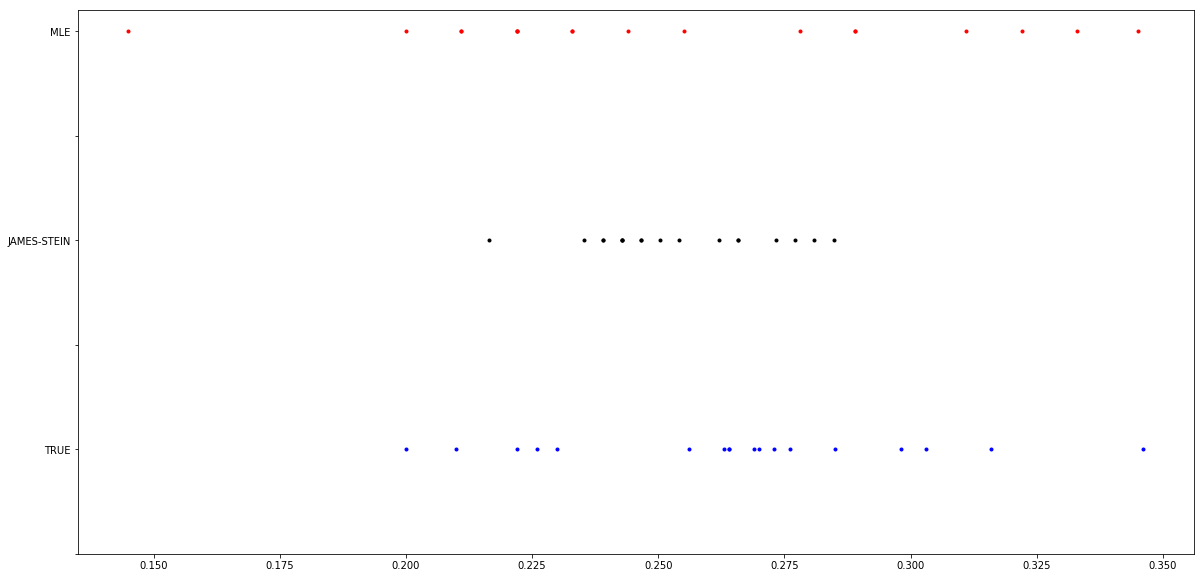

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(baseball_df['MLE'], np.repeat(5,baseball_df.shape[0]), '.r')
ax.plot(baseball_df['p_hat_JS'], np.repeat(3,baseball_df.shape[0]), '.k')
ax.plot(baseball_df['TRUTH'], np.repeat(1,baseball_df.shape[0]), '.b')
ax.set_yticks(np.arange(6))
ax.set_yticklabels(('','TRUE', '', 'JAMES-STEIN', '', 'MLE'))
fig.show()